<a href="https://colab.research.google.com/github/kunjkinger/machine-learning-projects/blob/nlp/text_feature_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('smsspamcollection.tsv',sep='\t')

In [3]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [4]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [5]:
len(df)

5572

In [6]:
df.columns

Index(['label', 'message', 'length', 'punct'], dtype='object')

In [7]:
df['label'].unique()

array(['ham', 'spam'], dtype=object)

In [8]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

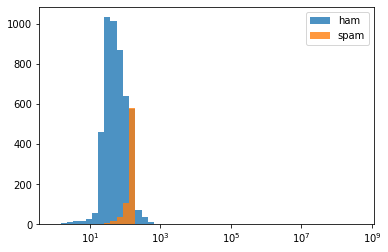

In [9]:
import matplotlib.pyplot as plt

plt.xscale('log')
bins = 1.5**(np.arange(0,50))
plt.hist(df[df['label'] == 'ham']['length'],bins=bins,alpha=0.8)
plt.hist(df[df['label'] == 'spam']['length'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

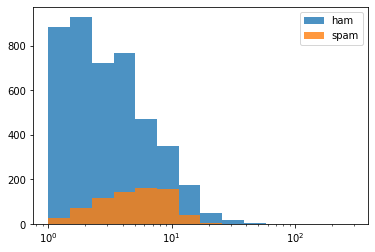

In [10]:

plt.xscale('log')
bins = 1.5**(np.arange(0,15))
plt.hist(df[df['label'] == 'ham']['punct'],bins=bins,alpha=0.8)
plt.hist(df[df['label'] == 'spam']['punct'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x = df[['length','punct']]
y = df['label']

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
lr_model = LogisticRegression(solver='lbfgs')

In [16]:
lr_model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
from sklearn import metrics

In [18]:
predictions = lr_model.predict(x_test)

In [19]:
print(metrics.confusion_matrix(y_test,predictions))

[[1404   44]
 [ 219    5]]


In [20]:
df = pd.DataFrame(metrics.confusion_matrix(y_test,predictions),index=['ham','spam'],columns=['ham','spam'])

In [21]:
df

,ham,spam
ham,1404,44
spam,219,5


In [22]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.87      0.97      0.91      1448
        spam       0.10      0.02      0.04       224

    accuracy                           0.84      1672
   macro avg       0.48      0.50      0.48      1672
weighted avg       0.76      0.84      0.80      1672



In [23]:
print(metrics.accuracy_score(y_test,predictions))

0.8427033492822966


In [24]:
from sklearn.naive_bayes import MultinomialNB

In [25]:
nb_model = MultinomialNB()

nb_model.fit(x_train,y_train)

predictions = nb_model.predict(x_test)

In [26]:
print(metrics.confusion_matrix(y_test,predictions))

[[1438   10]
 [ 224    0]]


In [27]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.87      0.99      0.92      1448
        spam       0.00      0.00      0.00       224

    accuracy                           0.86      1672
   macro avg       0.43      0.50      0.46      1672
weighted avg       0.75      0.86      0.80      1672



In [28]:
from sklearn.svm import SVC

In [29]:
svc_model = SVC(gamma='auto')
svc_model.fit(x_train,y_train)
predictions = svc_model.predict(x_test)

In [30]:
print(metrics.confusion_matrix(y_test,predictions))

[[1373   75]
 [ 121  103]]


In [31]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.92      0.95      0.93      1448
        spam       0.58      0.46      0.51       224

    accuracy                           0.88      1672
   macro avg       0.75      0.70      0.72      1672
weighted avg       0.87      0.88      0.88      1672



In [32]:
df = pd.read_csv('smsspamcollection.tsv',sep='\t')

In [33]:
x = df['message']
y = df['label']

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state= 42)

In [35]:
from sklearn.feature_extraction.text import CountVectorizer

In [36]:
count_vect = CountVectorizer()

In [37]:
x_train_counts = count_vect.fit_transform(x_train)

In [38]:
x_train_counts

<3733x7082 sparse matrix of type '<class 'numpy.int64'>'
	with 49992 stored elements in Compressed Sparse Row format>

In [39]:
x_train.shape # no of rows

(3733,)

In [40]:
x_train_counts.shape # no of rows with unique word 7082 in all 3733 row

(3733, 7082)

In [41]:
from sklearn.feature_extraction.text import TfidfTransformer

In [42]:
tfidf_transformer = TfidfTransformer()

In [43]:
x_train_tfidf = tfidf_transformer.fit_transform(x_train_counts)

In [44]:
x_train_tfidf.shape

(3733, 7082)

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer # this is the combinatin of both cv and tfidftransformer

In [47]:
vectorizer = TfidfVectorizer()

In [48]:
x_train_tfidf = vectorizer.fit_transform(x_train)

In [49]:
from sklearn.svm import LinearSVC

In [50]:
clf = LinearSVC()

In [51]:
clf.fit(x_train_tfidf,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [54]:
from sklearn.pipeline import Pipeline # this method do all in one

In [55]:
text_classifier = Pipeline([('tfidf',TfidfVectorizer()),('clf',LinearSVC())])

In [56]:
text_classifier.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
               

In [57]:
predictions = text_classifier.predict(x_test)

In [58]:
from sklearn.metrics import confusion_matrix,classification_report

In [59]:
print(confusion_matrix(y_test,predictions))

[[1586    7]
 [  12  234]]


In [60]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99      1593
        spam       0.97      0.95      0.96       246

    accuracy                           0.99      1839
   macro avg       0.98      0.97      0.98      1839
weighted avg       0.99      0.99      0.99      1839



In [61]:
from sklearn.metrics import accuracy_score

In [62]:
print(accuracy_score(y_test,predictions))

0.989668297988037


In [65]:
text_classifier.predict(["Hi how are you doing today?"])

array(['ham'], dtype=object)

In [66]:
text_classifier.predict(["Congratulation! you have been selected as a winner. TEXT WON to 44355425 congrraultions free entry to contest."])

array(['spam'], dtype=object)